In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv(r"C:\Users\bipas\Work\Potato_price_prediction\Agmarknet_Price_Report_Champadanga_files\final_price_champadanga_rainfall_data.csv")

In [3]:
# Extract month and year from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])



df['Month'] = df['Date'].dt.strftime('%m').str.upper()
df['Year'] = df['Date'].dt.year

In [4]:
# Convert the 'Month' column to integer type
df['Month'] = df['Month'].astype(int)

In [5]:
X = df.drop(columns=["Modal Price (Rs./Quintal)", "Max Price (Rs./Quintal)",'Date'])
y = df["Max Price (Rs./Quintal)"]

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Create a pipeline that includes scaling and KNN regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

In [8]:
# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsRegressor())])

In [9]:
# Predict on the testing set
y_pred = pipeline.predict(X_test)


In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [11]:
print("Mean Squared Error:", mse)
print("R-Squared:", r_squared)

Mean Squared Error: 11959.87951807229
R-Squared: 0.9303460673518978


Text(0.5, 1.0, 'Actual vs. Predicted Prices')

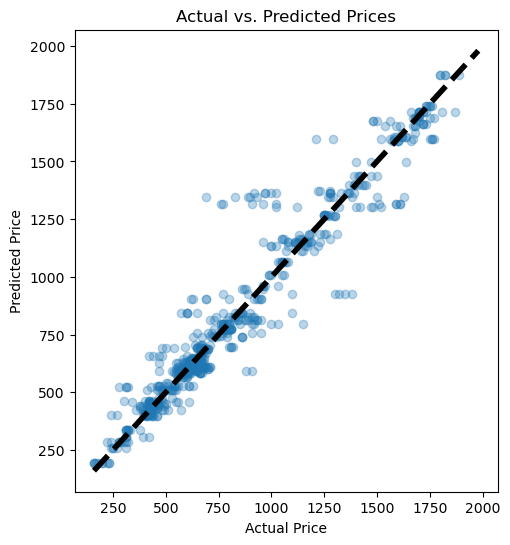

In [12]:
import matplotlib.pyplot as plt
# Scatter plot of actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
